<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH_BV/blob/main/Blockify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.vogeltreff24.de/images/product_images/popup_images/WG706_Silhouette_Little_Owl_Black_High_Res.jpg
600
3


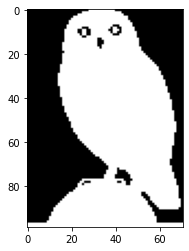

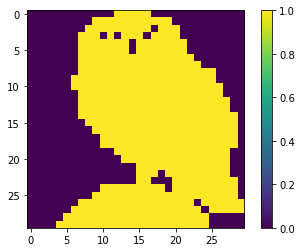

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

imageurl = ["https://www.atlasbig.com/images/deutschland.png",
            "https://www.vogeltreff24.de/images/product_images/popup_images/WG706_Silhouette_Little_Owl_Black_High_Res.jpg",
            "https://i.pinimg.com/originals/0f/4c/56/0f4c56e8816923771044fde19ae350d0.jpg",
            ]
"""img = io.imread(imageurl)[::2,::2]/255
kernelbase = io.imread(imageurl2)[::2,::2]/255
schland = (img[:,:,0]<0.5).astype(int)
kernelbase = (kernelbase[:,:,0]<0.5).astype(int)
print(np.min(schland), np.max(schland))
#schland = (np.sum(img, axis=-1)<1.5).astype(int)
schland = schland[np.sum(schland, axis=1)>0]
schland = schland[:, np.sum(schland, axis=0)>0]
schland = np.expand_dims(schland, axis=-1)

print(schland.shape)
print(np.repeat(schland, 3, axis=-1).shape)
"""

def silhouettify(imgurl, fac=1, cut=0.5, inv=False, max_size=150):
    print(imgurl)
    img = io.imread(imgurl)
    max_xy = np.max(img.shape)
    print(max_xy)
    s = 1
    while max_xy>max_size:
        max_xy = max_xy/2
        s+=1
    print(s)
    img = img[::int(s*fac),::int(s*fac)]/255
    out = (img[:,:,0]<cut).astype(int)
    if inv:
        out *= -1
    out = out[np.sum(out, axis=1)>0]
    out = out[:, np.sum(out, axis=0)>0]
    out = np.expand_dims(out, axis=-1)
    return out
    
def pad_dat_boi(img, n=10):
    h, w, c = img.shape
    padded = np.zeros((h+2*n,w+2*n, c))
    padded[n:h+n, n:w+n] = img
    padded[:n,n:w+n] = img[:n][::-1]
    padded[h+n:,n:w+n] = img[h-n:][::-1]
    padded[:,:n] = padded[:,2*n:n:-1]
    padded[:,n+w-1:] = padded[:,n+w-1:w-2:-1]
    return padded

def conv(img, kernel, pad=True):
    h, w, c = img.shape
    print(img.shape)
    k = kernel.shape[0]
    print(k)
    if pad:
        img_padded = pad_dat_boi(img, n=int(k/2))
    else:
        img_padded = img
    out = np.zeros((h, w, c))

    #for cc in range(c):
    for xx in range(k):
        #print(xx)
        for yy in range(k):
            out += kernel[xx,yy]*img_padded[xx:h+xx, yy:w+yy]
    return out

def get_points(img, kernel):
    img = img.squeeze()
    #img[img<0] = 0
    h, w = img.shape[:2]
    k = kernel.shape[0]
    points = []
    x, y = h-k, w-k
    for xx in range(x):
        for yy in range(y):
            #print(np.sum(kernel-img[xx:k+xx, yy:k+yy]))
            if np.sum(kernel*img[xx:k+xx, yy:k+yy])==np.sum(kernel):
                #print(xx, yy, k)
                points.append([xx, yy])
    return points

def negafy(img, points, kernel):
    img = img.squeeze()
    out = np.zeros(img.shape)
    k = kernel.shape[0]
    for point in points:
        xx, yy = point[0], point[1]
        out[xx:xx+k, yy:yy+k] += -kernel
        #print(k)
    out[out<0] = -k
    return out

def squarify(img, s=np.Inf):
    x, y = img.shape[:2]
    s = int(np.min([x, y, s]))
    out = np.zeros((s,s))
    for xx in range(s):
        for yy in range(s):
            out[xx,yy] = img[int(np.round(xx*x/s)), int(np.round(yy*y/s))]
    return out

schland = silhouettify(imageurl[1], fac=2)
plt.figure()
plt.imshow(255*np.repeat(schland, 3, axis=-1))
plt.show()
plt.figure()
plt.imshow(squarify(schland, s=30))
plt.colorbar()
plt.show()

(99, 71)
0.0


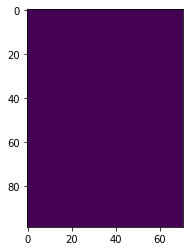

https://i.pinimg.com/originals/0f/4c/56/0f4c56e8816923771044fde19ae350d0.jpg
250
2
71
70
60
50
43 [[23, 22], [24, 23], [25, 24]]
40
30
21 [[77, 27]]
20
17 [[10, 32], [10, 33], [10, 34], [67, 49], [67, 50], [67, 51]]
16 [[18, 14], [19, 14]]
13 [[84, 14], [85, 13], [85, 14]]
11 [[34, 16]]
10
10 [[0, 27], [0, 28], [88, 47]]
9 [[10, 15]]
8 [[65, 41], [82, 62], [83, 59], [83, 60], [83, 61]]
7 [[11, 25], [12, 24], [12, 25], [78, 24], [79, 24]]
6 [[0, 37], [0, 38], [1, 21], [1, 22], [1, 37], [1, 38], [1, 39], [2, 19], [2, 20], [2, 21], [3, 18], [3, 19], [4, 42], [5, 42], [62, 56], [63, 56], [73, 34], [79, 44], [80, 44], [80, 45], [81, 44], [81, 45], [81, 46], [82, 46], [83, 46], [83, 47]]
5 [[18, 27], [20, 50], [37, 60], [38, 60], [39, 60], [40, 61], [44, 17], [44, 18], [44, 19], [45, 18], [46, 18], [63, 61], [67, 36], [68, 36], [69, 36]]
4 [[9, 31], [29, 58], [70, 48], [71, 47], [71, 48], [72, 47], [79, 21], [80, 20], [81, 19], [81, 20], [82, 56], [83, 56], [83, 57], [93, 9], [94, 8], [94, 9

In [ ]:
k = min(schland.shape[:2])
schland = schland.squeeze()
print(schland.shape)
minus_schland = np.zeros(schland.shape)
print(np.max(minus_schland))
plt.figure()
plt.imshow(minus_schland.squeeze())
plt.show()
kernelbase = silhouettify(imageurl[2])
#kernelbase =((base+base.T)<=1).astype(int)

#k=71
min_k = 1
step = 1
s = 1
print(k)
blockyboi = []
k_sizes = []
while k>min_k:
    if k%10==0:
        print(k)
    #kernel = np.ones((k,k))
    #base = np.expand_dims(np.linspace(-1,1,num=k)**2, axis=-1)
    #kernel = ((base+base.T)<=1).astype(int)
    kernel = squarify(kernelbase, k)
    points = get_points(schland+minus_schland, kernel)
    #print(points)
    if len(points)>0:
        print(k, points)
        minus_schland += negafy(schland, points, kernel)
        blockyboi.append(-minus_schland)
        k_sizes.append(k)
        s = step
    #print(np.min(minus_schland))
    k = k-s

print(len(blockyboi))

In [ ]:
a = 4
a -= 1
print(a)

3


-43.0
4


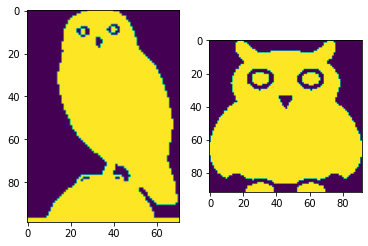

(99, 71)


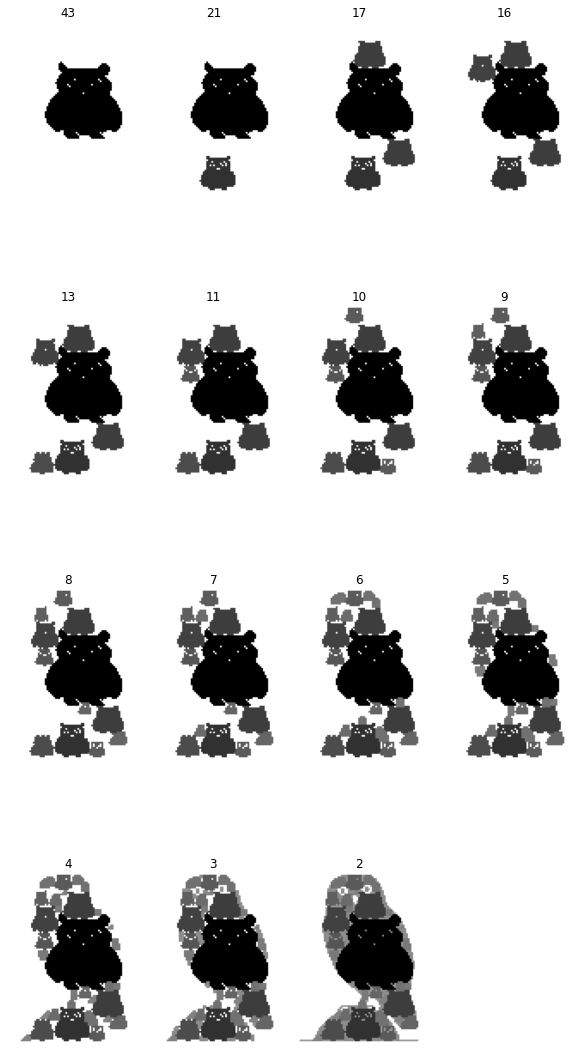

In [ ]:
print(np.min(minus_schland))
n_img = int(len(blockyboi)/4+1)
print(n_img)
boi = schland.squeeze()+minus_schland+1
boi = -minus_schland
plt.figure()
plt.subplot(1,2,1)
plt.imshow(schland.squeeze())
plt.subplot(1,2,2)
plt.imshow(squarify(kernelbase))
plt.show()
print(boi.shape)
plt.figure(figsize=[10,20])
max_val = np.max(blockyboi[-1])
for i, m in enumerate(blockyboi):
    plt.subplot(n_img,4,i+1)
    plt.imshow(np.repeat(np.expand_dims(1-(m/max_val)**(0.3), axis=-1), 3, axis=-1))
    plt.title(k_sizes[i])
    plt.axis("off")
plt.show()


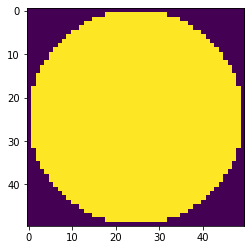

1876


In [ ]:
k = 50
base = np.expand_dims(np.linspace(-1,1,num=k)**2, axis=-1)
kernel = ((base+base.T)<=1).astype(int)
plt.figure()
plt.imshow(kernel)
plt.show()
print(np.sum(kernel))
#print(kernel)